In [6]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sc

General Concepts

:mod:matplotlib has an extensive codebase that can be daunting to many new users. However, most of matplotlib can be understood with a fairly simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the :mod:matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

Note
Pyplot's state-machine environment behaves similarly to MATLAB and should be most familiar to users with MATLAB experience.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.
For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

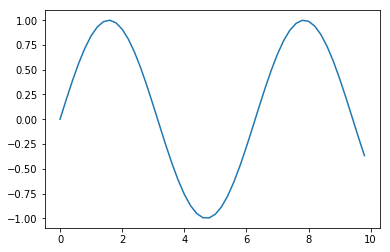

In [10]:
x = np.arange(0, 10, 0.2) #start by making an array of data
y = np.sin(x)
a = np.cos(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

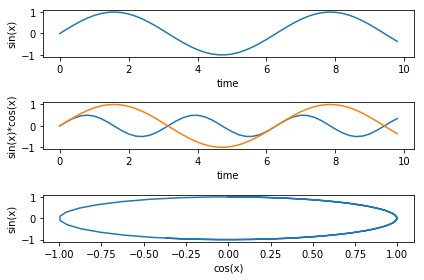

In [38]:
#Now lets take the data we made with numpy and manipulate it
#new array of data from sin(x)*cos(x)
b = y*a
fig, ax = plt.subplots(3,1)
ax[0].plot(x,y)
ax[0].set_xlabel('time')
ax[0].set_ylabel('sin(x)')

#sin(x)*cos(x)
ax[1].plot(x,b)
ax[1].plot(x,y)
ax[1].set_xlabel('time')
ax[1].set_ylabel('sin(x)*cos(x)')
#sin(x) vs cos(x)
ax[2].plot(y,a)
ax[2].set_xlabel('cos(x)')
ax[2].set_ylabel('sin(x)')

fig.tight_layout()
plt.show() #this will plot each differenc subplot on its own graph

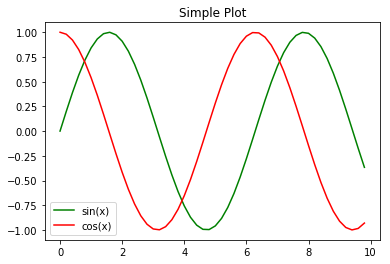

In [37]:
plt.plot(x,y, label= 'sin(x)', c = 'g') #plot different plot on same plot with Legend and colors
plt.plot(x,a, label= 'cos(x)', c = 'r')
plt.title("Simple Plot")
plt.legend()
fig.tight_layout()
plt.show()

Now Lets do some Curve Fitting of Scatter Sin(x) With SciPy

Lets make data

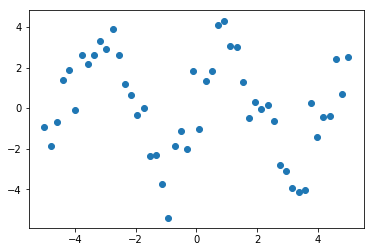

In [39]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

Now lets Fit the data

In [40]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


Now lets plot the results

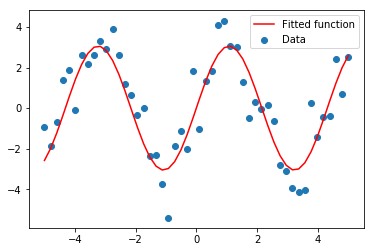

In [41]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function', c='r')

plt.legend(loc='best')

plt.show()

SciPy can also do Integration and Derviative and Solve Function

In [42]:
import numpy as np
def f1(x):
   return x**2

def f2(x):
   return x**3

x = np.array([1,3,4])
y1 = f1(x)
from scipy.integrate import simps
I1 = simps(y1, x)
print(I1)

21.0


In [62]:
from sympy import *
init_printing()
x = Symbol('x')
integrate(x**2,x)

In [60]:
integrate(x**2,(x,1,4))

///Now we will look at Pickle

In [58]:
import pandas as pd
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#figsize(15, 5)

broken_df = pd.read_csv('../data/bikes.csv')
# Look at the first 3 rows
broken_df[:3]



FileNotFoundError: [Errno 2] File b'../data/bikes.csv' does not exist: b'../data/bikes.csv'